In [1]:
%autosave 0

Autosave disabled


In [45]:
## python files that contain the functions to aquire and prep the data
import wrangle
import explore
import model
import pandas as pd
import numpy as np

# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from env import get_connection
import math

# scikit learn
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE

#visulization settings
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.style as style 
style.available
style.use('seaborn-talk') #sets the size of the charts
style.use('seaborn-colorblind') #sets color of charts

#warnings
import warnings
warnings.filterwarnings("ignore")

# Data Summary

In [3]:
df = wrangle.clean_zillow(wrangle.get_zillow_data())
df.head()

,bedrooms,bathrooms,yearbuilt,county,zip_code,fips,latitude,longitude,square_feet,taxamount,tax_value,property_age,tax_rate
parcelid,,,,,,,,,,,,,
14297519,4,3.5,1998,1286,96978,6059,33634931,-117869207,3100.0,11013.72,1023282.0,23,0.010763
17052889,2,1.0,1967,2061,97099,6111,34449266,-119281531,1465.0,5672.48,464000.0,54,0.012225
14186244,3,2.0,1962,1286,97078,6059,33886168,-117823170,1243.0,6488.30,564778.0,59,0.011488
12177905,4,3.0,1970,3101,96330,6037,34245180,-118240722,2376.0,1777.51,145143.0,51,0.012247
10887214,3,3.0,1964,3101,96451,6037,34185120,-118414640,1312.0,1533.89,119407.0,57,0.012846


In [4]:
df.describe()

,bedrooms,bathrooms,yearbuilt,county,zip_code,fips,latitude,longitude,square_feet,taxamount,tax_value,property_age,tax_rate
count,77252.000000,77252.000000,77252.000000,77252.000000,77252.000000,77252.000000,7.725200e+04,7.725200e+04,77252.000000,77252.000000,7.725200e+04,77252.000000,77252.000000
mean,3.061151,2.304257,1968.598910,2535.851590,96586.485308,6048.770414,3.400856e+07,-1.182035e+08,1784.137071,5977.964178,4.886553e+05,52.401090,0.013167
std,1.129847,0.990174,23.786378,801.103519,3800.252247,20.707293,2.652612e+05,3.588724e+05,953.270485,7576.193460,6.499171e+05,23.786378,0.005758
min,0.000000,0.000000,1824.000000,1286.000000,95982.000000,6037.000000,3.333953e+07,-1.194753e+08,128.000000,19.920000,1.000000e+03,5.000000,0.000094
25%,2.000000,2.000000,1953.000000,1286.000000,96193.000000,6037.000000,3.381480e+07,-1.184150e+08,1182.000000,2714.877500,2.070000e+05,34.000000,0.011662
50%,3.000000,2.000000,1970.000000,3101.000000,96389.000000,6037.000000,3.402211e+07,-1.181809e+08,1541.000000,4447.620000,3.587820e+05,51.000000,0.012286
75%,4.000000,3.000000,1987.000000,3101.000000,96987.000000,6059.000000,3.417437e+07,-1.179290e+08,2110.000000,6920.750000,5.685390e+05,68.000000,0.013455
max,16.000000,18.000000,2016.000000,3101.000000,399675.000000,6111.000000,3.481877e+07,-1.175546e+08,35640.000000,586639.300000,4.906124e+07,197.000000,0.816490


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77252 entries, 14297519 to 12826780
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      77252 non-null  int64  
 1   bathrooms     77252 non-null  float64
 2   yearbuilt     77252 non-null  int64  
 3   county        77252 non-null  int64  
 4   zip_code      77252 non-null  int64  
 5   fips          77252 non-null  int64  
 6   latitude      77252 non-null  int64  
 7   longitude     77252 non-null  int64  
 8   square_feet   77252 non-null  float64
 9   taxamount     77252 non-null  float64
 10  tax_value     77252 non-null  float64
 11  property_age  77252 non-null  int64  
 12  tax_rate      77252 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 8.3 MB


In [6]:
df.shape

(77252, 13)

# Is fips the key driver?

In [7]:
df.fips.value_counts()
df.fips.value_counts(normalize=True)


6037    0.654404
6059    0.265456
6111    0.080140
Name: fips, dtype: float64

There are three fibs with their respective location
Los Angeles County, California (6037)
Orange County, California (6059)
Ventura County, California (6111)

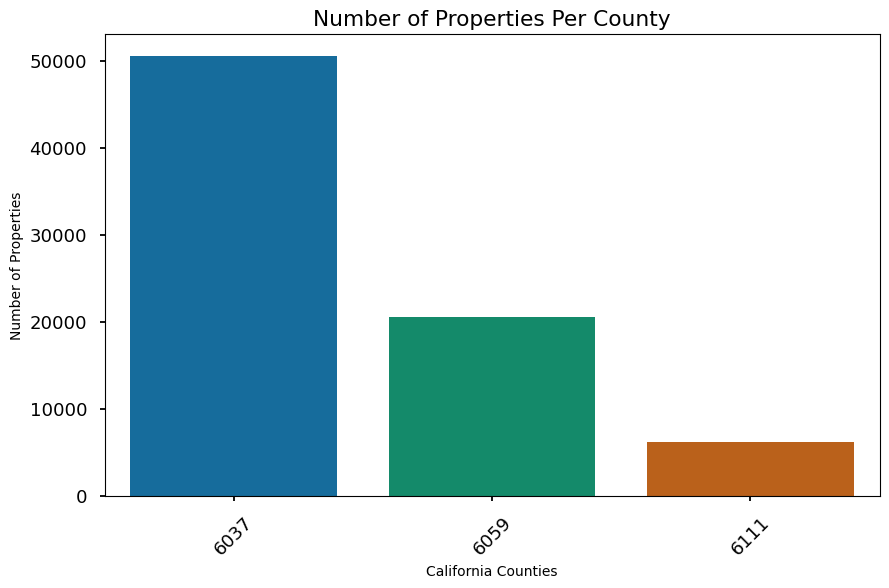

In [8]:
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.title('Number of Properties Per County')
sns.countplot(data=df, x='fips')
plt.xlabel('California Counties')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

In [9]:
#Change fips to county names now that we know where they come from
df.rename(columns={"fips": "ca_county"}, inplace=True)
df['ca_county'] = df['ca_county'].map({6037: 'Los Angeles', 6059: 'Orange', 6111: 'Ventura'})


In [10]:
df.ca_county.value_counts()

Los Angeles    50554
Orange         20507
Ventura         6191
Name: ca_county, dtype: int64

# is taxrate the key driver?

In [11]:
tax_rates = df.groupby("ca_county").tax_rate.mean()
tax_rates 

ca_county
Los Angeles    0.013768
Orange         0.012064
Ventura        0.011912
Name: tax_rate, dtype: float64

In [12]:
lac = df[df.ca_county == "Los Angeles"].tax_rate
lac_mean = round(lac.mean(),3)

(0.0, 0.1)

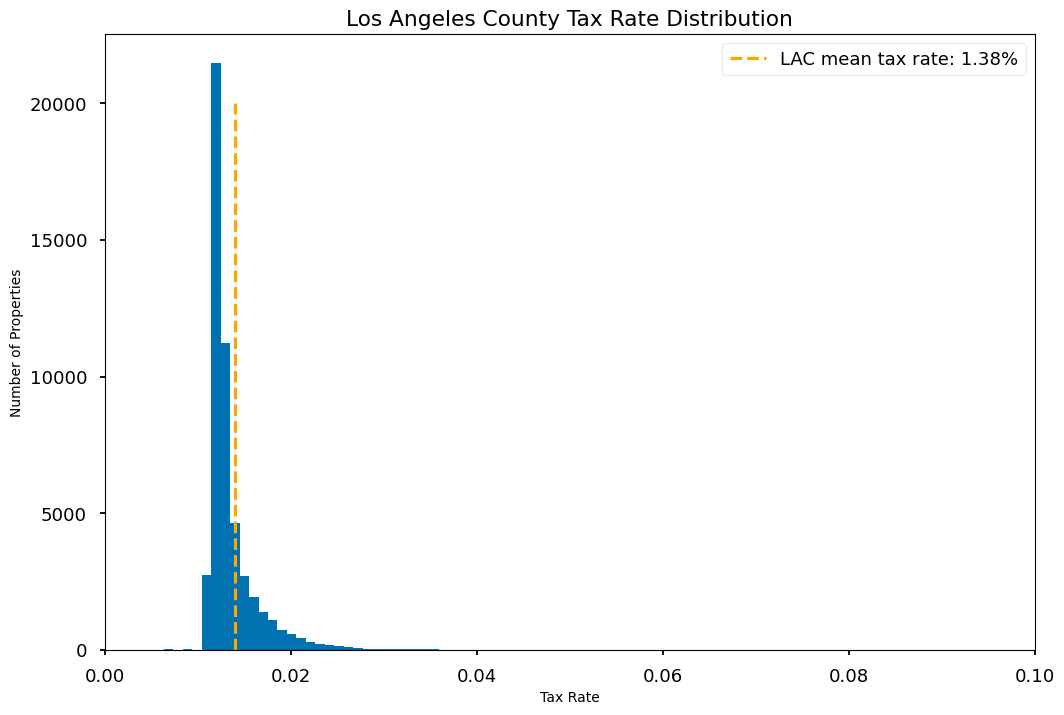

In [13]:
plt.figure(figsize=(12,8))
plt.title("Los Angeles County Tax Rate Distribution")
plt.hist(lac, bins=800)
plt.vlines(lac_mean, 0, 20000, ls='--', color='orange', label="LAC mean tax rate: 1.38%")
plt.xlabel('Tax Rate')
plt.ylabel("Number of Properties")
plt.legend()
plt.xlim(0.0, 0.1)

In [14]:

oc = df[df.ca_county == "Orange"].tax_rate
oc_mean = round(oc.mean(), 3)

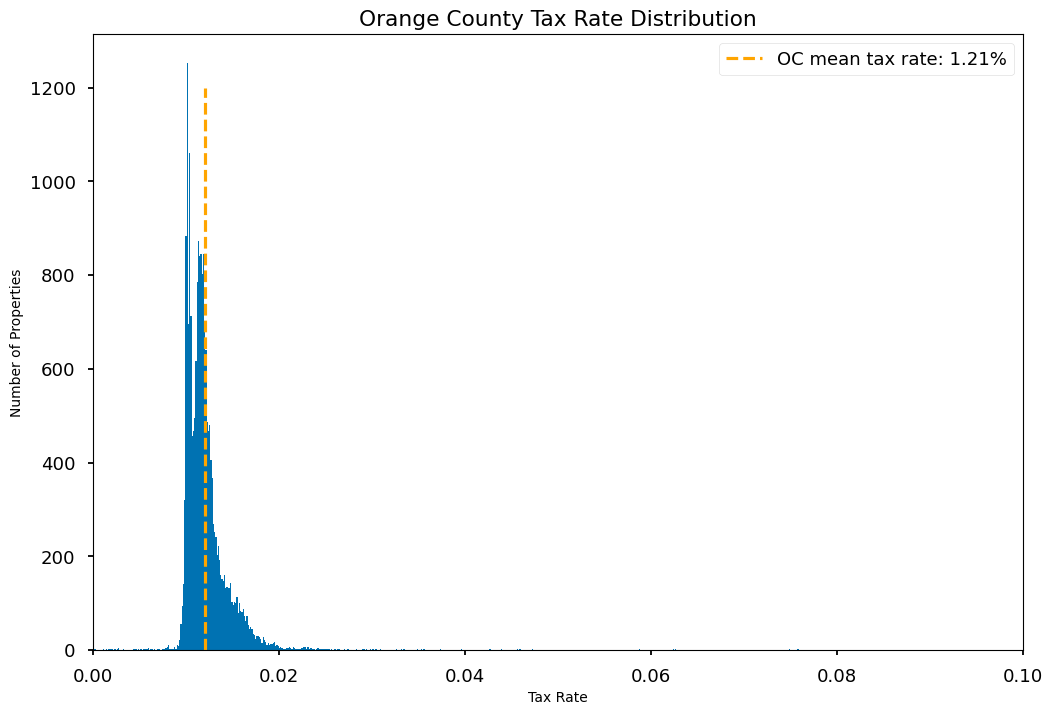

In [15]:
plt.figure(figsize=(12,8))
plt.title("Orange County Tax Rate Distribution")
plt.hist(oc, bins=800)
plt.vlines(oc_mean, 0, 1200, ls='--', color='orange', label="OC mean tax rate: 1.21%")
plt.xlabel('Tax Rate')
plt.xlim(0.0, 0.1)
plt.ylabel("Number of Properties")
plt.legend()

In [16]:

vc = df[df.ca_county == "Ventura"].tax_rate
vc_mean = round(vc.mean(), 3)
vc_mean

0.012

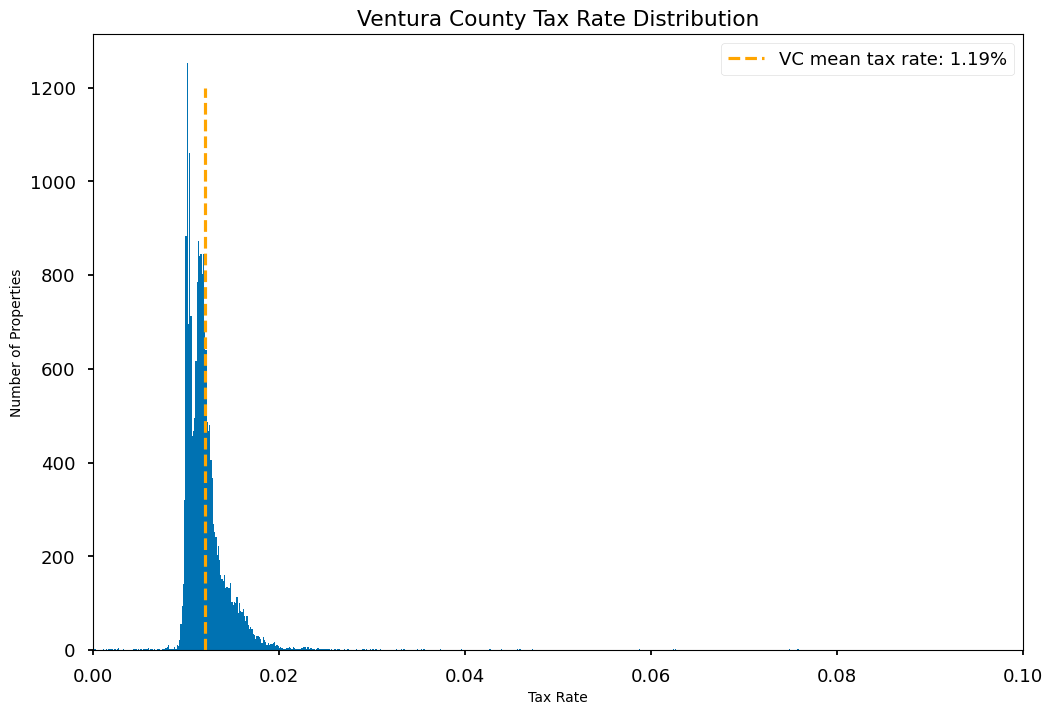

In [17]:
plt.figure(figsize=(12,8))
plt.title("Ventura County Tax Rate Distribution")
plt.hist(oc, bins=800)
plt.vlines(vc_mean, 0, 1200, ls='--', color='orange', label="VC mean tax rate: 1.19%")
plt.xlabel('Tax Rate')
plt.ylabel('Number of Properties')
plt.xlim(0.0, 0.1)
plt.legend()

# MPV

In [18]:
mvp = df.copy()
mvp.head()

,bedrooms,bathrooms,yearbuilt,county,zip_code,ca_county,latitude,longitude,square_feet,taxamount,tax_value,property_age,tax_rate
parcelid,,,,,,,,,,,,,
14297519,4,3.5,1998,1286,96978,Orange,33634931,-117869207,3100.0,11013.72,1023282.0,23,0.010763
17052889,2,1.0,1967,2061,97099,Ventura,34449266,-119281531,1465.0,5672.48,464000.0,54,0.012225
14186244,3,2.0,1962,1286,97078,Orange,33886168,-117823170,1243.0,6488.30,564778.0,59,0.011488
12177905,4,3.0,1970,3101,96330,Los Angeles,34245180,-118240722,2376.0,1777.51,145143.0,51,0.012247
10887214,3,3.0,1964,3101,96451,Los Angeles,34185120,-118414640,1312.0,1533.89,119407.0,57,0.012846


In [19]:
mvp.describe()

,bedrooms,bathrooms,yearbuilt,county,zip_code,latitude,longitude,square_feet,taxamount,tax_value,property_age,tax_rate
count,77252.000000,77252.000000,77252.000000,77252.000000,77252.000000,7.725200e+04,7.725200e+04,77252.000000,77252.000000,7.725200e+04,77252.000000,77252.000000
mean,3.061151,2.304257,1968.598910,2535.851590,96586.485308,3.400856e+07,-1.182035e+08,1784.137071,5977.964178,4.886553e+05,52.401090,0.013167
std,1.129847,0.990174,23.786378,801.103519,3800.252247,2.652612e+05,3.588724e+05,953.270485,7576.193460,6.499171e+05,23.786378,0.005758
min,0.000000,0.000000,1824.000000,1286.000000,95982.000000,3.333953e+07,-1.194753e+08,128.000000,19.920000,1.000000e+03,5.000000,0.000094
25%,2.000000,2.000000,1953.000000,1286.000000,96193.000000,3.381480e+07,-1.184150e+08,1182.000000,2714.877500,2.070000e+05,34.000000,0.011662
50%,3.000000,2.000000,1970.000000,3101.000000,96389.000000,3.402211e+07,-1.181809e+08,1541.000000,4447.620000,3.587820e+05,51.000000,0.012286
75%,4.000000,3.000000,1987.000000,3101.000000,96987.000000,3.417437e+07,-1.179290e+08,2110.000000,6920.750000,5.685390e+05,68.000000,0.013455
max,16.000000,18.000000,2016.000000,3101.000000,399675.000000,3.481877e+07,-1.175546e+08,35640.000000,586639.300000,4.906124e+07,197.000000,0.816490


In [20]:
mvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77252 entries, 14297519 to 12826780
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      77252 non-null  int64  
 1   bathrooms     77252 non-null  float64
 2   yearbuilt     77252 non-null  int64  
 3   county        77252 non-null  int64  
 4   zip_code      77252 non-null  int64  
 5   ca_county     77252 non-null  object 
 6   latitude      77252 non-null  int64  
 7   longitude     77252 non-null  int64  
 8   square_feet   77252 non-null  float64
 9   taxamount     77252 non-null  float64
 10  tax_value     77252 non-null  float64
 11  property_age  77252 non-null  int64  
 12  tax_rate      77252 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usage: 8.3+ MB


In [21]:
mvp.drop(['yearbuilt', 'county', 'zip_code', 'ca_county', 'latitude','longitude', 'taxamount', 'property_age', 'tax_rate'], axis=1, inplace=True)


In [22]:
mvp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77252 entries, 14297519 to 12826780
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     77252 non-null  int64  
 1   bathrooms    77252 non-null  float64
 2   square_feet  77252 non-null  float64
 3   tax_value    77252 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.9 MB


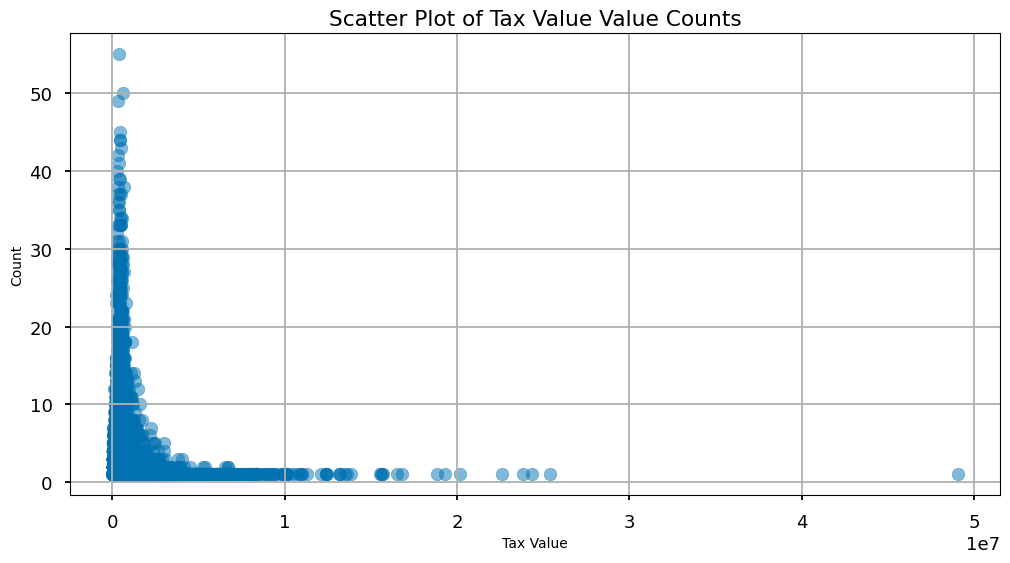

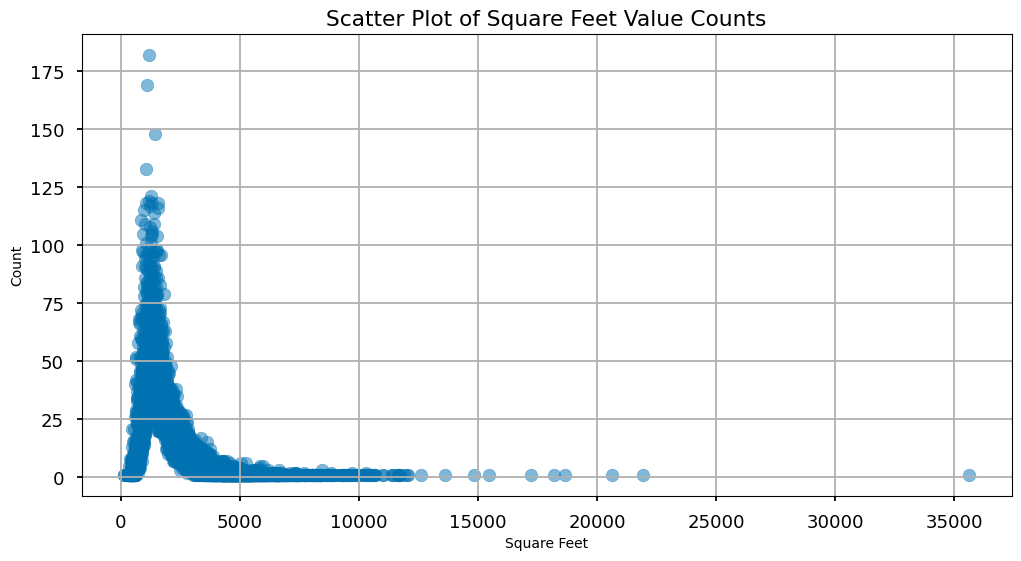

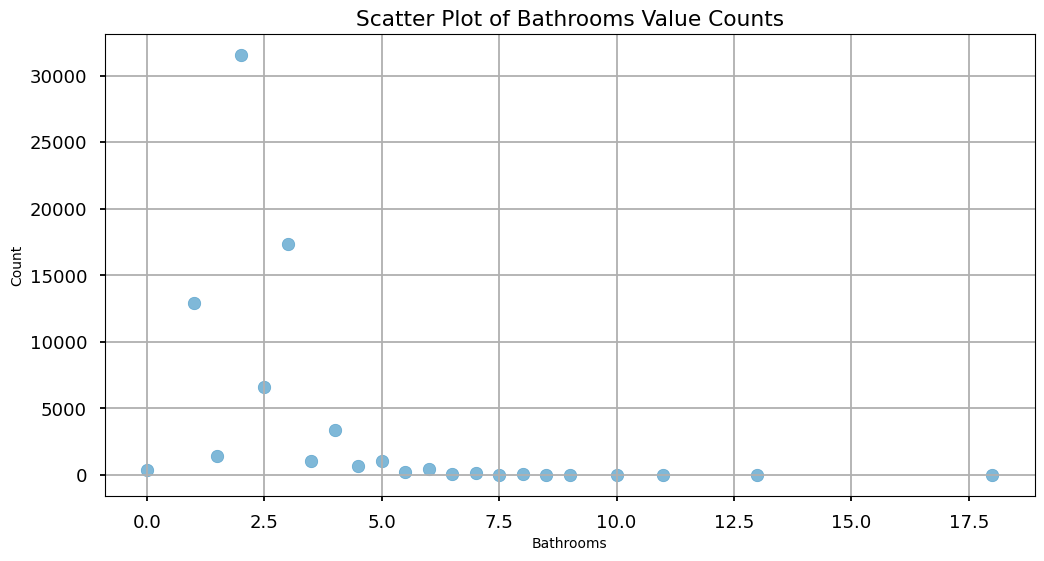

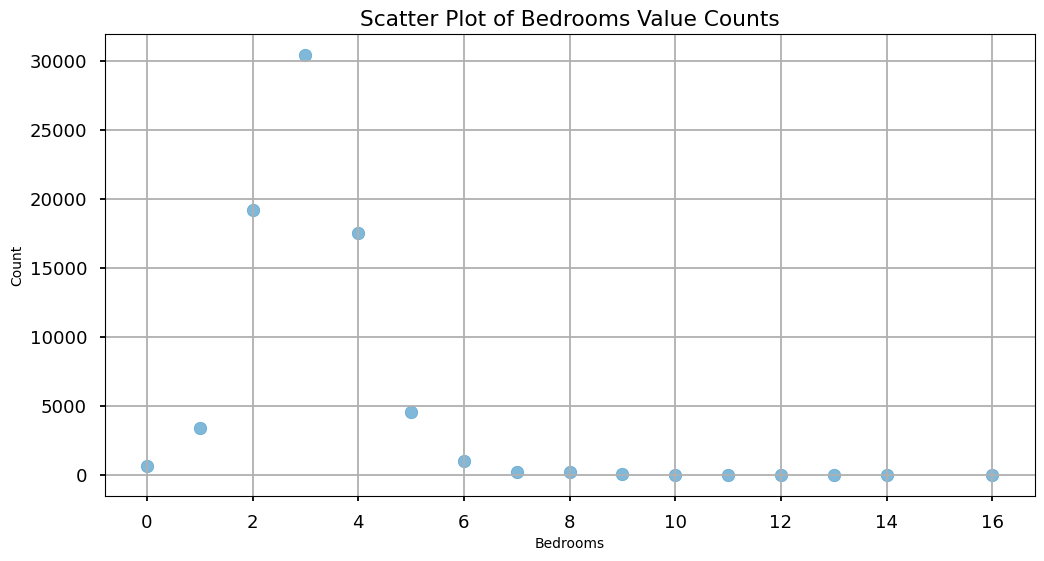

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'mvp' with the required columns

# Create a scatter plot for tax_value
plt.figure(figsize=(12, 6))
plt.scatter(mvp.tax_value.value_counts().index, mvp.tax_value.value_counts().values, alpha=0.5)
plt.title('Scatter Plot of Tax Value Value Counts')
plt.xlabel('Tax Value')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Create a scatter plot for square_feet
plt.figure(figsize=(12, 6))
plt.scatter(mvp.square_feet.value_counts().index, mvp.square_feet.value_counts().values, alpha=0.5)
plt.title('Scatter Plot of Square Feet Value Counts')
plt.xlabel('Square Feet')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Create a scatter plot for bathrooms
plt.figure(figsize=(12, 6))
plt.scatter(mvp.bathrooms.value_counts().index, mvp.bathrooms.value_counts().values, alpha=0.5)
plt.title('Scatter Plot of Bathrooms Value Counts')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Create a scatter plot for bedrooms
plt.figure(figsize=(12, 6))
plt.scatter(mvp.bedrooms.value_counts().index, mvp.bedrooms.value_counts().values, alpha=0.5)
plt.title('Scatter Plot of Bedrooms Value Counts')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.grid(True)
plt.show()


### MVP prep takeaway:

All chosen features have outliers and the data is being skewed by really expensive houses. 

### Clean and Prep 

renamed necessary columns, change necessary datatypes, 

### Visualize Univariates

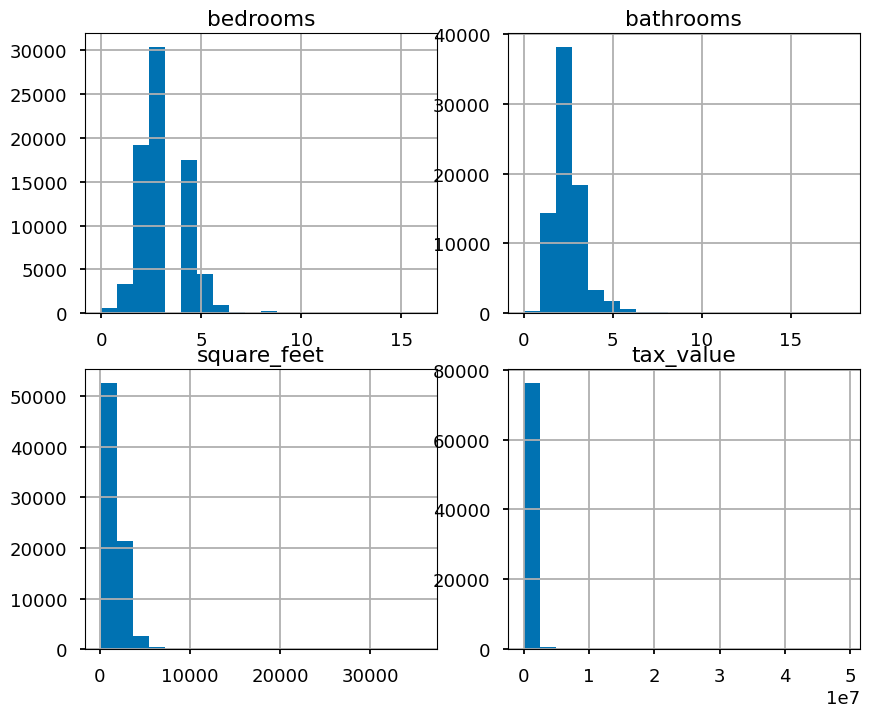

In [24]:

plt.figure(figsize=(10, 8))
for i, col in enumerate(['bedrooms', 'bathrooms', 'square_feet', 'tax_value']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(2,2, plot_number)
    plt.title(col)
    series.hist(bins=20)

Bedroms are normally distributed in comparison to bathrooms being skewed to the right. So is square_feet and tax_value

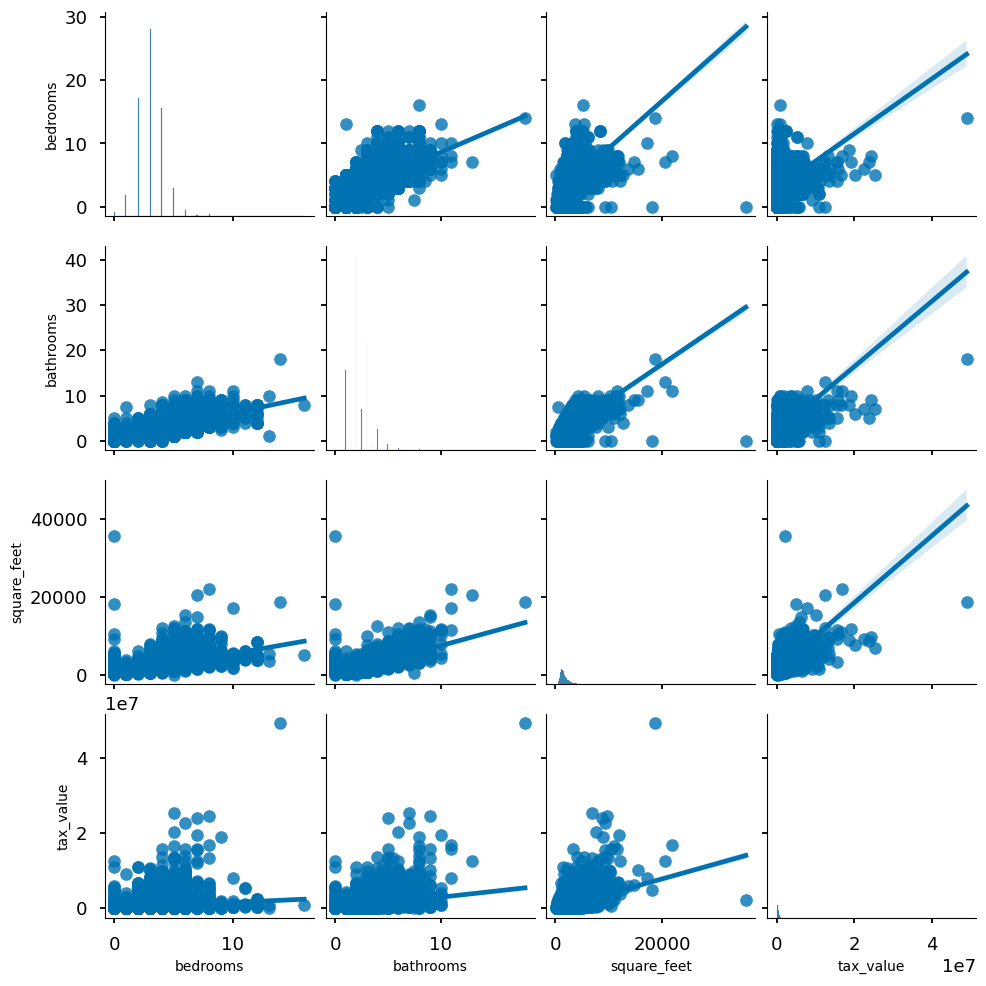

In [25]:
sns.pairplot(mvp,
            x_vars=["bedrooms", "bathrooms", "square_feet", 'tax_value'],
            y_vars=["bedrooms", "bathrooms", "square_feet", 'tax_value'],
            kind= "reg")

The bigger the square_feetthe biggerthe bath and bedrooms

The more the tax_value the more square_feet, bathrooms, and bedrooms

From this I will use the correlation test to confirm my hypotheses

But first I will split my dataset and scale numerical features

### MVP Explore

In [26]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test_split(mvp,'tax_value', 123)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (43260, 4)
validate -> (18541, 4)
test -> (15451, 4)


In [27]:

train.head()

,bedrooms,bathrooms,square_feet,tax_value
parcelid,,,,
17228134,3,2.0,1888.0,246735.0
11322311,3,3.0,3095.0,349000.0
17153382,2,2.0,1937.0,540544.0
14682419,3,3.0,1526.0,630000.0
13941783,3,1.0,4380.0,444538.0


#### Scale all numeric feature to normalize 

In [28]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.Standard_Scaler(X_train, X_validate, X_test)
scaler, X_train_scaled, X_validate_scaled, X_test_scaled


(StandardScaler(),
           bedrooms  bathrooms  square_feet
 parcelid                                  
 17228134 -0.052499  -0.309698     0.107487
 11322311 -0.052499   0.698774     1.386685
 17153382 -0.935503  -0.309698     0.159418
 14682419 -0.052499   0.698774    -0.276167
 13941783 -0.052499  -1.318170     2.748548
 ...            ...        ...          ...
 11993657 -0.052499   0.698774    -0.134151
 14346543  0.830506   0.194538     0.317330
 14306263 -0.052499  -0.309698    -0.263449
 14267069 -0.052499  -0.309698    -0.012273
 14328699  1.713511   3.219953     5.646086
 
 [43260 rows x 3 columns],
           bedrooms  bathrooms  square_feet
 parcelid                                  
 12698037 -0.052499  -0.309698    -0.261329
 12994032 -0.052499  -1.318170    -0.571855
 12898868 -0.052499  -1.318170    -0.358832
 10846545  0.830506  -0.309698     0.306732
 14506802 -0.935503  -0.309698    -0.272987
 ...            ...        ...          ...
 12597791  0.830506  -0.3096

In [29]:
X_train_scaled.head()


,bedrooms,bathrooms,square_feet
parcelid,,,
17228134,-0.052499,-0.309698,0.107487
11322311,-0.052499,0.698774,1.386685
17153382,-0.935503,-0.309698,0.159418
14682419,-0.052499,0.698774,-0.276167
13941783,-0.052499,-1.318170,2.748548


### Statistical Tests

Correlations

In [30]:
#set confidence interval and alpha before the test
alpha = .05

## Hypothesis 1:
Hypothesis = there is no correlation between the square feet and tax value

Alternative = there is a correlation between square feet and tax value

In [31]:
#calculate pearsons correlation coefficient
corr, p = stats.pearsonr(train.square_feet, train.tax_value)
corr, p

(0.5941579211216848, 0.0)

In [32]:
#correlation test summary
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis")

Pvalue is: 0.0 is less than alpha: 0.05
Reject the null hypothesis


## Hypothesis 2:

Null = There is no correlation between bathrooms and tax value 

Alternative = There is a correlation between bathrooms and tax value

In [33]:
#calculate pearsons correlation coefficient
corr, p = stats.pearsonr(train.bathrooms, train.tax_value)
corr, p

(0.4729912245714432, 0.0)

In [34]:
#correlation test summary
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis")

Pvalue is: 0.0 is less than alpha: 0.05
Reject the null hypothesis


## Hypothesis 3:

Null = There are no correlation between bedrooms and tax_value

Alternative = There is a correlation between the bedrooms and tax_value

In [35]:
#calculate pearsons correlation coefficient
corr, p = stats.pearsonr(train.bedrooms, train.tax_value)
corr, p

(0.2487080958070595, 0.0)

In [36]:
#correlation test summary
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis")


Pvalue is: 0.0 is less than alpha: 0.05
Reject the null hypothesis


If i don't have time to identify the key driver for home tax value, I will state at the very least we were able to conclude that square feet has a correlation with tax value, bedroom, and bathroom.

# Modeling

In [37]:
X_train_scaled.head()


,bedrooms,bathrooms,square_feet
parcelid,,,
17228134,-0.052499,-0.309698,0.107487
11322311,-0.052499,0.698774,1.386685
17153382,-0.935503,-0.309698,0.159418
14682419,-0.052499,0.698774,-0.276167
13941783,-0.052499,-1.318170,2.748548


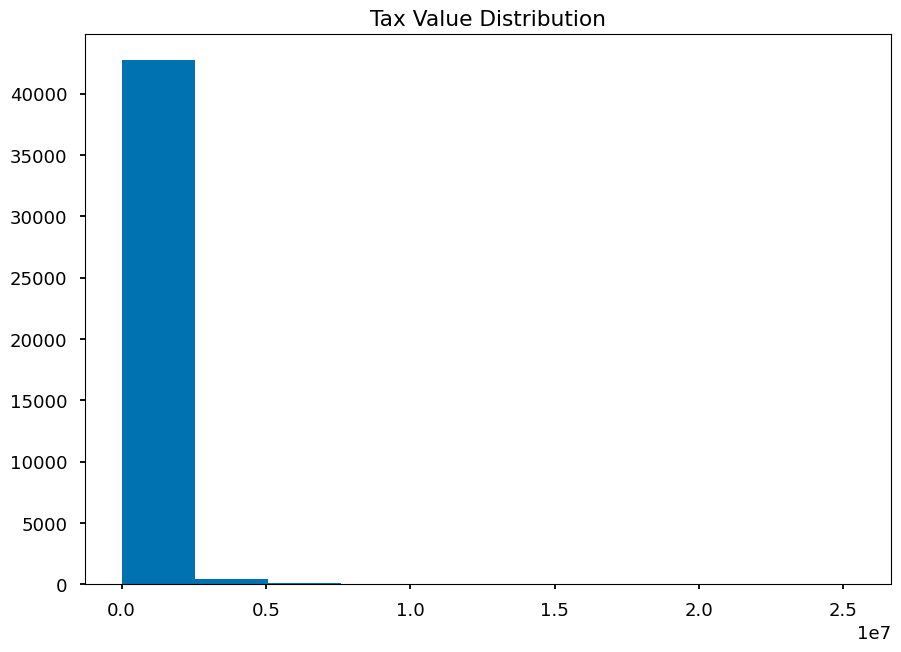

In [38]:
# see distribution?
plt.hist(y_train)
plt.title('Tax Value Distribution')
plt.show()

In [39]:
y_train 

parcelid
17228134     246735.0
11322311     349000.0
17153382     540544.0
14682419     630000.0
13941783     444538.0
              ...    
11993657     491259.0
14346543     371880.0
14306263     718578.0
14267069     122560.0
14328699    4073264.0
Name: tax_value, Length: 43260, dtype: float64

In [40]:
X_train.shape, X_train_scaled.shape, y_train.shape, X_validate.shape, X_validate_scaled.shape, y_validate.shape, X_test.shape, X_test_scaled.shape, y_test.shape


((43260, 3),
 (43260, 3),
 (43260,),
 (18541, 3),
 (18541, 3),
 (18541,),
 (15451, 3),
 (15451, 3),
 (15451,))

In [41]:
#Create a Handy DataFrame for Evaluating Your Models or Model and Baseline Value.
#turn series into df
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_train.head()

,tax_value
parcelid,
17228134,246735.0
11322311,349000.0
17153382,540544.0
14682419,630000.0
13941783,444538.0


### Baseline

In [42]:
# predict the median for ytrain and yvalidate
baseline_median = y_train['tax_value'].median()
y_train['baseline_median'] = baseline_median
y_validate['baseline_median'] = baseline_median

#predict the mean for ytrain and yvalidate
baseline_mean = y_train['tax_value'].mean()
y_train['baseline_mean'] = baseline_mean
y_validate['baseline_mean'] = baseline_mean
y_train.head()

,tax_value,baseline_median,baseline_mean
parcelid,,,
17228134,246735.0,359907.5,490082.010888
11322311,349000.0,359907.5,490082.010888
17153382,540544.0,359907.5,490082.010888
14682419,630000.0,359907.5,490082.010888
13941783,444538.0,359907.5,490082.010888


### Should I use mean or median? 

In [43]:
#Evaluate the baseline model using the mean
model.baseline_mean_errors(y_train.tax_value)

#Evaluate the baseline model using the median
model.baseline_median_errors(y_train.tax_value)

# RMSE of pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.baseline_mean) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.baseline_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# RMSE of pred_median
rmse_train = mean_squared_error(y_train.tax_value, y_train.baseline_median) ** .5
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.baseline_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))


RMSE using Mean
Train/In-Sample:  632703.83 
Validate/Out-of-Sample:  738506.92
RMSE using Median
Train/In-Sample:  645956.3 
Validate/Out-of-Sample:  750360.66


Chat GPT said since I am concerned about outliers, I do want to utilize the median as my baseline

## Train and Validate with the models

### Linear Regression

In [48]:
lm = LinearRegression()
lm.fit(X_train, y_train.tax_value)

LinearRegression()

In [50]:
y_train['pred_lm'] = lm.predict(X_train)
y_train

,tax_value,baseline_median,baseline_mean,pred_lm
parcelid,,,,
17228134,246735.0,359907.5,490082.010888,5.226829e+05
11322311,349000.0,359907.5,490082.010888,1.130961e+06
17153382,540544.0,359907.5,490082.010888,6.814932e+05
14682419,630000.0,359907.5,490082.010888,4.288187e+05
13941783,444538.0,359907.5,490082.010888,1.569742e+06
...,...,...,...,...
11993657,491259.0,359907.5,490082.010888,4.887849e+05
14346543,371880.0,359907.5,490082.010888,5.084746e+05
14306263,718578.0,359907.5,490082.010888,3.660546e+05


In [51]:
rmse_train_lm = mean_squared_error(y_train.tax_value, y_train.pred_lm)**(0.5)
y_validate['pred_lm'] = lm.predict(X_validate)
rmse_validate_lm = mean_squared_error(y_validate.tax_value, y_validate.pred_lm)**(0.5)
print(f'''
BASELINE:
              
RMSE using Median
Train/In-Sample: {round(rmse_train, 2)}
Validate/Out-of-Sample: {round(rmse_validate, 2)}
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: {round(rmse_train_lm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
''')


BASELINE:
              
RMSE using Median
Train/In-Sample: 645956.3
Validate/Out-of-Sample: 750360.66
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: 495735.23
Validation/Out-of-Sample: 601004.39



### LassoLars

In [53]:
lars = LassoLars(alpha=1.0)
lars.fit(X_train, y_train.tax_value)

LassoLars()

In [55]:
y_train['pred_lars'] = lars.predict(X_train)
rmse_train_lars = mean_squared_error(y_train.tax_value, y_train.pred_lars)**(0.5)
y_validate['pred_lars'] = lars.predict(X_validate)
rmse_validate_lars = mean_squared_error(y_validate.tax_value, y_validate.pred_lars)**(0.5)
print(f'''
BASELINE:
              
RMSE using Median
Train/In-Sample: {round(rmse_train, 2)}
Validate/Out-of-Sample: {round(rmse_validate, 2)}
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: {round(rmse_train_lm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
------------------------------------
RMSE for LassoLars:

Training/In-Sample: {round(rmse_train_lars, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
''')


BASELINE:
              
RMSE using Median
Train/In-Sample: 645956.3
Validate/Out-of-Sample: 750360.66
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: 495735.23
Validation/Out-of-Sample: 601004.39
------------------------------------
RMSE for LassoLars:

Training/In-Sample: 495735.23
Validation/Out-of-Sample: 601004.5



### Tweedie Regressor

In [56]:
glm = TweedieRegressor(power=1, alpha=0)
glm.fit(X_train, y_train.tax_value)

TweedieRegressor(alpha=0, power=1)

In [58]:
y_train['pred_glm'] = glm.predict(X_train)
rmse_train_glm = mean_squared_error(y_train.tax_value, y_train.pred_glm)**(0.5)
y_validate['pred_glm'] = glm.predict(X_validate)
rmse_validate_glm = mean_squared_error(y_validate.tax_value, y_validate.pred_glm)**(0.5)
print(f'''
BASELINE:
              
RMSE using Median
Train/In-Sample: {round(rmse_train, 2)}
Validate/Out-of-Sample: {round(rmse_validate, 2)}
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: {round(rmse_train_lm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
------------------------------------
RMSE for LassoLars:

Training/In-Sample: {round(rmse_train_lars, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0:

Training/In-Sample: {round(rmse_train_glm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
''')


BASELINE:
              
RMSE using Median
Train/In-Sample: 645956.3
Validate/Out-of-Sample: 750360.66
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: 495735.23
Validation/Out-of-Sample: 601004.39
------------------------------------
RMSE for LassoLars:

Training/In-Sample: 495735.23
Validation/Out-of-Sample: 601004.5
------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0:

Training/In-Sample: 632703.83
Validation/Out-of-Sample: 738506.92



### Polynomial Regression

In [63]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [66]:
# create the model object
lm2 = LinearRegression()

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.tax_value, y_train.pred_lm2)**(0.5)

# predict validate
y_validate['pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.tax_value, y_validate.pred_lm2)**(0.5)
print(f'''
BASELINE:
              
RMSE using Median
Train/In-Sample: {round(rmse_train, 2)}
Validate/Out-of-Sample: {round(rmse_validate, 2)}
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: {round(rmse_train_lm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
------------------------------------
RMSE for LassoLars:

Training/In-Sample: {round(rmse_train_lars, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0:

Training/In-Sample: {round(rmse_train_glm, 2)}
Validation/Out-of-Sample: {round(rmse_validate_glm, 2)}
------------------------------------
RMSE for Polynomial Model, degrees=2:

Training/In-Sample: {round(rmse_train_lm2, 2)}
Validation/Out-of-Sample: {round(rmse_validate_lm2, 2)}

''')                                       
                                       
                                       


BASELINE:
              
RMSE using Median
Train/In-Sample: 645956.3
Validate/Out-of-Sample: 750360.66
------------------------------------
RMSE for OLS using LinearRegression:
    
Training/In-Sample: 495735.23
Validation/Out-of-Sample: 601004.39
------------------------------------
RMSE for LassoLars:

Training/In-Sample: 495735.23
Validation/Out-of-Sample: 601004.5
------------------------------------
RMSE for GLM using Tweedie, power=1 & alpha=0:

Training/In-Sample: 632703.83
Validation/Out-of-Sample: 738506.92
------------------------------------
RMSE for Polynomial Model, degrees=2:

Training/In-Sample: 474002.77
Validation/Out-of-Sample: 542996.62




## Evaluate

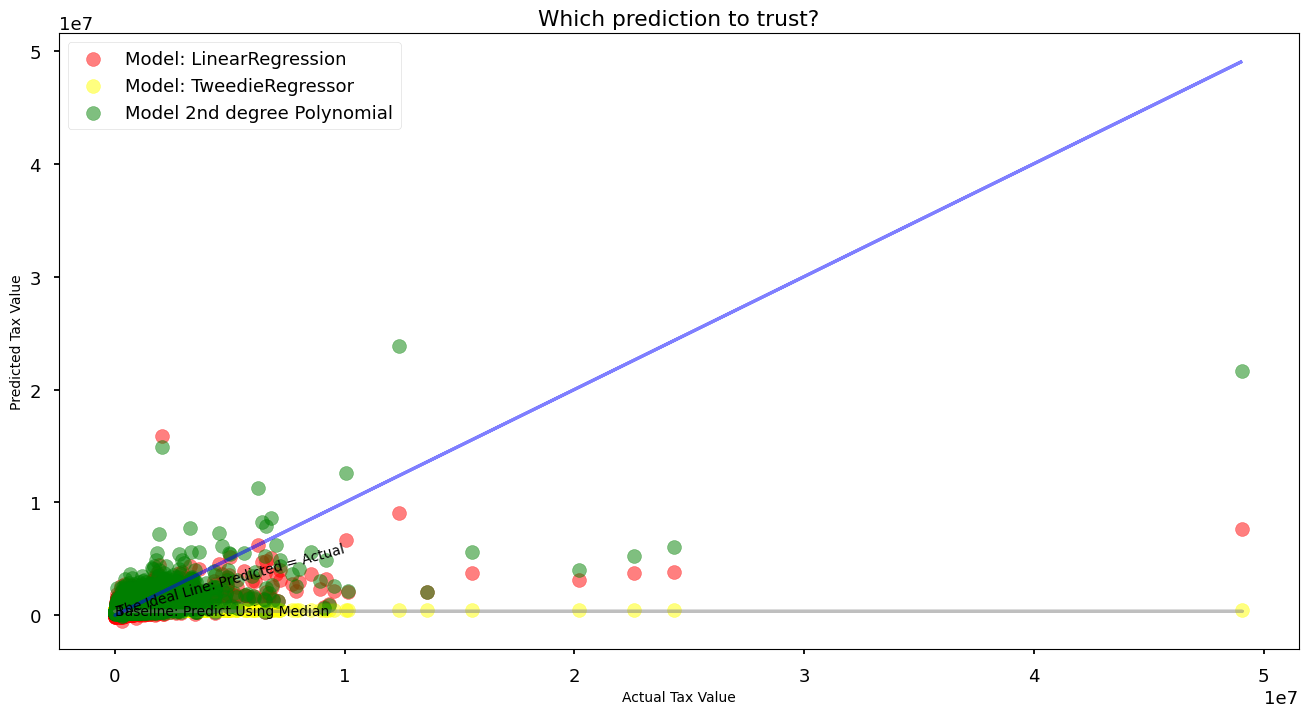

In [88]:
# y_validate.head()
plt.figure(figsize=(16,8))
plt.plot(y_validate.tax_value, y_validate.baseline_median, alpha=.5, color="gray", label='_nolegend_')
plt.annotate("Baseline: Predict Using Median", (16, 9.5))
plt.plot(y_validate.tax_value, y_validate.tax_value, alpha=.5, color="blue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.tax_value, y_validate.pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.pred_glm, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.pred_lm2, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Predicted Tax Value")
plt.title("Which prediction to trust?")
plt.show()

In [89]:
metric_df = pd.DataFrame(data=[{
    'model': 'median_baseline', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.baseline_median)}])

metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate_lm,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lm)}, ignore_index=True)

metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate_lm,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lm)}, ignore_index=True)


metric_df = metric_df.append({
    'model': 'GLS (Poisson)', 
    'RMSE_validate': rmse_validate_glm,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_glm)}, ignore_index=True)


metric_df = metric_df.append({
    'model': 'Quadratic Model', 
    'RMSE_validate': rmse_validate_lm2,
    'r^2_validate': explained_variance_score(y_validate.tax_value, y_validate.pred_lm2)}, ignore_index=True)


In [80]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,750360.658373,0.000000e+00
1,OLS Regressor,601004.394426,3.377215e-01
2,Lasso alpha 1,601004.496598,3.377213e-01
3,GLS (Poisson),738506.919431,-2.220446e-16
4,Quadratic Model,542996.619436,4.593816e-01


## Test

In [81]:
y_test = pd.DataFrame(y_test)

#predict on test
y_test['pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.pred_lm2)**(0.5)

print(f"""
RMSE for Polynomial Regressor, degrees=2:
    
Test/Out-of-Sample Performance: {rmse_test}
""")


RMSE for Polynomial Regressor, degrees=2:
    
Test/Out-of-Sample Performance: 440060.9612622683



# MORE DATA TO TEST

Conclusion: 

    I was able to confirm the that square feet, bathrooms, and bedrooms have a significant correlation with tax_value
    
    With more time I would like to gather more data without outlier for testing
    